Our code

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.array([0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0])
y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, -1, -0.5, 0, 0])

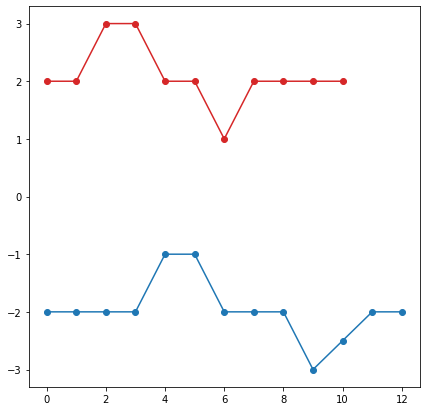

In [3]:
plt.figure(figsize=(7, 7))
plt.plot(np.arange(x.shape[0]), x + 2, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 2, "-o", c="C0")

In [4]:
#Distance matrix
import math
n=x.shape[0]
m=y.shape[0]
distance_matrix=np.zeros((n, m))
for i in range(n):
  for j in range(m):
    distance_matrix[i,j]=abs(x[i]-y[j])
print(distance_matrix)
print(distance_matrix.shape)

[[0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [1.  1.  1.  1.  0.  0.  1.  1.  1.  2.  1.5 1.  1. ]
 [1.  1.  1.  1.  0.  0.  1.  1.  1.  2.  1.5 1.  1. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [1.  1.  1.  1.  2.  2.  1.  1.  1.  0.  0.5 1.  1. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]
 [0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.5 0.  0. ]]
(11, 13)


In [12]:
#code for DTW
def DTW(distance_matrix):
    N=distance_matrix.shape[0]
    M=distance_matrix.shape[1]
    cost_matrix=np.zeros((N+1, M+1))
    for i in range(1,N+1):
        cost_matrix[i,0]=np.inf
    for i in range(1,M+1):
        cost_matrix[0,i]=np.inf
    #declaring matrix for traceback
    traceback_matrix=np.zeros((N, M))
    for i in range(N):
        for j in range(M):
            penalty=[
                cost_matrix[i,j], # match
                cost_matrix[i,j+1], #insert
                cost_matrix[i+1,j] #deletion
             ]
            index_penalty=np.argmin(penalty)
            cost_matrix[i+1,j+1]=distance_matrix[i,j]+penalty[index_penalty]
            traceback_matrix[i,j]=index_penalty
      #tracing back
    R = N-1
    C = M-1
    path_tracker=[(R,C)]
    while R>0 or C>0:
        value=traceback_matrix[R,C]
        if value == 0:
            C=C-1
            R=R-1
        if value == 1:
            R=R-1
        else:
            C=C-1
        path_tracker.append((R,C))
    # Stripping the cost_matrix
    cost_matrix = cost_matrix[1:, 1:]
    return (path_tracker[::-1], cost_matrix)

Alignment cost: 0.5000
Normalized alignment cost: 0.0208


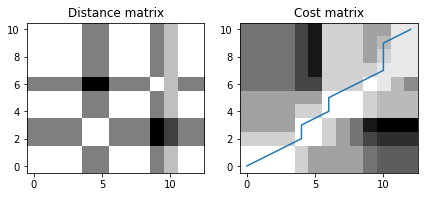

In [13]:
path,cost_matrix = DTW(distance_matrix)
print("Alignment cost: {:.4f}".format(cost_matrix[n-1,m-1]))
print("Normalized alignment cost: {:.4f}".format(cost_matrix[n-1,m-1]/(n+m)))
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.title("Distance matrix")
plt.imshow(distance_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
plt.subplot(122)
plt.title("Cost matrix")
plt.imshow(cost_matrix, cmap=plt.cm.binary, interpolation="nearest", origin="lower")
x_path, y_path = zip(*path)
plt.plot(y_path, x_path);

(-0.6000000000000001, 12.6, -2.75, 2.75)

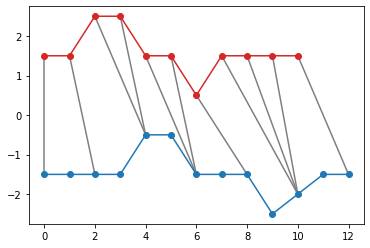

In [19]:
plt.figure()
for x_i, y_j in path:
    plt.plot([x_i, y_j], [x[x_i] + 1.5, y[y_j] - 1.5], c="C7")
plt.plot(np.arange(x.shape[0]), x + 1.5, "-o", c="C3")
plt.plot(np.arange(y.shape[0]), y - 1.5, "-o", c="C0")
plt.axis("on")